<a href="https://colab.research.google.com/github/amity1415/Insaid/blob/master/PCA_MNIST_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(784,)


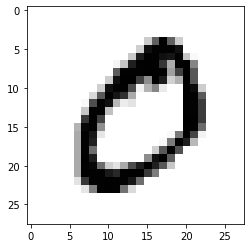

In [173]:


import sklearn
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import mlxtend.data
from mlxtend.data import loadlocal_mnist
from sklearn.datasets import fetch_openml

mnist= fetch_openml('mnist_784')
X,y= mnist['data'], mnist['target']	

digit_test= X[1]
print(digit_test.shape) ##the digit is in a single Row with 784 cols.
digit_test_image= digit_test.reshape(28,28)## Reshaping it to 28*28

plt.imshow(digit_test_image, cmap=matplotlib.cm.binary, interpolation='nearest')

In [174]:
type(digit_test)

numpy.ndarray

In [175]:
y[1]

'0'

In [176]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(X)
# ensure to understand its importance

In [177]:
# Let us view entire possible transformtion for df under consideration
from sklearn.decomposition import PCA
pca = PCA(n_components = .5)
principalComponents = pca.fit_transform(x)


In [178]:
type(principalComponents)

numpy.ndarray

In [179]:
PC_df = pd.DataFrame(data = principalComponents)
PC_df.head()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,-0.891720,-4.929711,-0.093038,-8.064180,-0.751001,1.051980,0.283377,1.423696,-1.168523,2.406929,-1.330609,3.269546,3.022839,8.888603,-4.128878,2.254652,8.303377,-4.134214,4.402143,3.921384,-5.164933,0.260673,-2.431289,-2.781884,-2.212005,-2.672388,1.294495,5.017080,0.364979,-0.103957,-3.146816,1.711779,2.128689,2.107822,0.619344,-5.025392,0.864514,0.060800,0.883865
1,8.813530,-7.517560,-3.714185,-1.766171,0.891472,-5.107950,-0.134795,3.197223,-0.238224,-1.003382,-3.349344,-1.254795,-2.411946,-3.919341,-3.027826,-1.176719,-0.037599,1.468827,3.165507,0.936482,-3.624515,-1.837798,2.539826,0.077271,-1.914550,-0.119093,-1.706681,0.075744,-0.342225,0.260514,1.022326,1.606968,1.567860,-3.660889,-0.894668,-0.008198,-0.948927,-1.184021,0.882179
2,2.204835,9.824461,-5.752488,1.479673,4.397900,2.507393,18.927843,3.888938,2.443365,-0.145296,-7.377445,2.023420,0.683597,-0.330238,12.261370,9.560811,-4.691458,4.208711,4.465518,4.835956,9.232379,1.210316,-0.253012,-7.499449,-0.765113,-0.255858,3.207874,9.844513,2.167533,2.955643,-3.492020,3.398431,0.952555,-5.161981,0.233282,0.227608,-0.509848,-0.943464,-0.325656
3,-6.534627,-4.029669,3.524017,-0.218098,5.606259,3.493731,1.445046,-4.683887,-0.613930,-2.533648,-2.276405,3.849409,-0.036696,-3.844612,-0.951812,2.209973,-0.917823,1.564761,-0.131848,-0.155584,-1.819958,-0.547340,-1.036494,-1.961018,1.536018,0.917744,-1.367578,-0.639071,0.991479,-1.049006,-0.348834,-1.436073,-0.542291,-1.614674,1.271152,-0.859385,-0.063320,0.016637,0.580517
4,-5.251618,3.278848,-6.182219,1.462658,-1.667989,-0.580801,-0.565828,-3.129538,0.005915,-0.972611,4.690669,0.145346,0.236667,-1.990848,-1.743585,-0.877407,-1.752464,5.607420,0.249852,1.955801,-0.892523,-0.189549,-0.780645,1.477916,-4.034878,-1.375146,-0.483954,-1.224623,-0.765716,-0.119686,0.582360,1.932977,2.551989,-0.907934,-3.326028,3.304077,0.221052,-1.603824,-0.236674


In [180]:
PC_df.shape ##39 Columns define 50% of the Image. (784 Columns define 100 Percent)

(70000, 39)

In [181]:
principalComponents_Inverse= pca.inverse_transform(principalComponents) ##Performing Inverse Transform to get back the Original Set of Data from the Dimentionally Reduced data.
#We will get back to the original columns and try to generate its original values(approx) from the 50% PCA defined columns. (39 Columns)

In [182]:
type(principalComponents_Inverse)

numpy.ndarray

In [183]:
principalComponents_Inverse.shape

(70000, 784)

In [184]:

PC_df_Inverse = pd.DataFrame(data = principalComponents_Inverse)##Setting the NDarray to a dataframe.
PC_df_Inverse.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,1.035613e-16,4.400768e-15,2.663886e-15,5.887276e-16,1.242971e-15,2.696106e-15,-2.459903e-15,1.260673e-15,-5.286268e-16,-1.865591e-16,3.182399e-16,4.514169e-16,-0.004629,-0.020283,-0.028761,-0.028761,2.783282e-16,-3.962262e-16,-9.318272e-16,-1.223510e-15,1.477634e-15,-1.726687e-16,3.909479e-16,-6.359353e-16,9.782189e-19,5.083275e-17,8.256801e-16,-3.647854e-16,-1.712423e-15,4.370231e-16,6.926936e-16,1.675471e-16,0.009961,0.006021,-0.012817,0.002633,0.072241,0.137072,0.188174,0.189381,...,-0.890623,-0.513150,0.024016,0.346125,0.294922,0.020345,-0.233300,-0.228859,-0.183888,0.097734,0.0,0.0,0.0,0.0,0.0,0.0,0.399848,0.433918,0.279627,-0.125057,-0.336782,-0.445901,-0.440983,-0.323203,-0.232024,-0.308569,-0.567473,-0.764575,-0.752849,-0.474551,-0.125341,0.093542,0.093202,-0.057122,-0.207498,-0.198715,0.0,0.0,0.0,0.0
1,5.600734e-19,9.083370e-16,-1.756079e-15,8.410881e-17,-9.677532e-16,-1.042278e-15,8.201796e-16,1.248241e-15,-1.146804e-16,9.055710e-17,1.598897e-15,-3.480588e-16,-0.017568,-0.051816,-0.065933,-0.065933,1.270180e-16,2.797753e-16,-4.859293e-16,9.762356e-16,8.085562e-16,-1.448279e-16,3.074507e-16,8.001325e-16,4.038204e-16,4.560872e-16,-9.031471e-16,-2.442920e-16,1.774017e-15,-5.394424e-16,-9.875623e-16,-5.102697e-17,-0.002217,-0.000126,0.001161,0.016347,0.069077,0.119810,0.153848,0.162620,...,0.147802,0.198514,0.177287,0.122764,0.087584,0.074836,0.035232,-0.029206,-0.092163,-0.000881,0.0,0.0,0.0,0.0,0.0,0.0,-0.026529,-0.010549,0.010925,0.009684,-0.001940,-0.064768,-0.189871,-0.265105,-0.284500,-0.240633,-0.144245,-0.052264,0.035414,0.095007,0.093712,0.079458,0.062006,0.055707,0.047325,0.036442,0.0,0.0,0.0,0.0
2,4.577915e-18,-2.109546e-16,3.537270e-15,1.664417e-15,8.443615e-16,-1.787225e-15,-3.708183e-15,1.367780e-15,6.896886e-16,3.754501e-16,9.064662e-16,1.014449e-16,0.061449,0.084869,0.065076,0.065076,3.147311e-15,-4.107510e-15,1.123924e-15,-1.828664e-15,-3.974786e-15,2.932235e-16,-7.011108e-16,1.990939e-16,-2.659410e-16,2.551243e-16,1.859412e-15,-9.859359e-16,3.584679e-16,-2.342633e-15,5.939265e-17,-1.798232e-15,-0.054366,-0.311972,-0.697852,-0.802337,-0.725216,-0.639103,-0.330847,-0.097417,...,0.292840,0.768679,1.102755,1.195473,1.063125,0.674001,0.095017,-0.311319,-0.482086,-0.029507,0.0,0.0,0.0,0.0,0.0,0.0,-0.115411,-0.107125,-0.181523,-0.253322,-0.280150,-0.383424,-0.482229,-0.452758,-0.482899,-0.476426,-0.304074,0.064299,0.704090,1.156160,1.299197,1.072177,0.801503,0.411316,0.101044,-0.127326,0.0,0.0,0.0,0.0
3,-4.475415e-18,6.187728e-16,-2.072949e-15,-1.274094e-15,-1.418996e-15,-1.116013e-15,-4.928126e-16,3.456258e-16,-7.480408e-16,-7.902048e-16,-5.687986e-16,7.722513e-17,0.058369,0.084355,0.068238,0.068238,2.926877e-16,4.550410e-17,-3.930853e-16,1.485408e-15,-3.178077e-16,-4.500176e-16,-6.315840e-16,6.583931e-16,6.056177e-16,-8.561020e-17,5.221889e-16,-6.985329e-16,-9.096906e-16,1.019230e-15,-2.928379e-16,-3.617173e-16,0.036211,0.051539,0.051224,0.046499,0.034753,0.036582,0.060219,0.107777,...,-0.169206,-0.179565,-0.223538,-0.268590,-0.263133,-0.186047,-0.107259,-0.062288,-0.024911,0.001093,0.0,0.0,0.0,0.0,0.0,0.0,-0.024264,-0.028886,-0.004519,0.043976,0.068855,0.083859,0.082380,0.039959,0.004031,-0.001757,0.011377,0.027086,0.011597,-0.024080,-0.089891,-0.124948,-0.122560,-0.076279,-0.038298,-0.023056,0.0,0.0,0.0,0.0
4,-1.593236e-17,-8.102574e-16,-6.260758e-16,-1.533883e-15,-9.157858e-16,-1.263237e-15,2.197622e-16,-5.578355e-16,1.049220e-15,5.871176e-16,2.574932e-15,5.237146e-16,-0.073058,-0.123364,-0.115952,-0.115952,-4.207102e-17,3.913957e-16,2.683645e-17,-4.963187e-17,7.580851e-16,-5.202775e-16,8.197266e-16,-7.122136e-16,-1.745395e-17,-3.117401e-16,-8.487676e-16,-3.198909e-16,8.107638e-16,3.962771e-16,-8.273869e-16,2.832787e-16,-0.073252,-0.

In [185]:
PC_df.shape

(70000, 39)

In [186]:
digit_test_Inverse=principalComponents_Inverse[1]
print(digit_test_Inverse.shape) ##Original columns are retrivied and its approximate values are predicted from the 50% PCA generated columns(39 columns)
digit_test_image_Inverse= digit_test_Inverse.reshape(28,28) ## Reshaping it to 28*28 matrix so as to get a pictorial view of the data.
type(digit_test_image_Inverse)

(784,)


numpy.ndarray

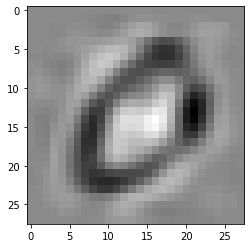

In [187]:


plt.imshow(digit_test_image_Inverse, cmap=matplotlib.cm.binary, interpolation='nearest') ## Predicting the data after inverse Transform.

In [188]:
y[1]

'0'